In [1]:
# https://www.kaggle.com/ivannatarov/covid-19-a-fall-of-darkness-eda-plotly
# Libraries for working with dataframes
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Library for displaying multiple dataframes at once (well and much more)
from IPython.display import display, display_html

# Setting for pandas library to output string data in numeric (not exponential) format
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [2]:
def viz_scatter(number_of_graphs: int, 
                df, 
                fill: str, 
                hovertemplate_name: list, 
                color_list: list, 
                title_one: str, 
                title_two: str, 
                y_title: str):
    '''
    
    The function accepts the following arguments:
    
    number_of_graphs - the number of objects that need to be placed on the chart (for example, two lines, etc.)
    df - dataframe
    fill - parameter to fill the area under the line 
    hovertemplate_name - captions on hover
    color_list - line colors 
    title_one - first chart name
    title_two - the second name of the chart
    y_title - y-axis label
    legend_x - x-axis position of the legend
    
    '''
    # Create an empty list to add data for graphs
    data = []
    
    # At each iteration, we create parameters for the chart objects
    for graph_number in range(number_of_graphs):
        graph = go.Scatter(
                   hoverinfo='skip', # Removing signatures when selecting
                   x=df.iloc[:, 0], # Passing data for the x-axis
                   y=df.iloc[:, graph_number + 1], # Passing data for the y-axis
                   fill=fill, 
                   # Set your own format for pies on hover
                   hovertemplate='<b>%{x}</b><br>' + f'<b>{hovertemplate_name[graph_number]}: </b>'+'%{y}<extra></extra>', 
                   # Setting the color
                   marker_color=color_list[graph_number], 
                   # Setting a caption on hover
                   name=hovertemplate_name[graph_number]
        ) 

        # Adding parameters to the list
        data.append(graph)
    
    # We transfer data for visualization
    fig = go.Figure(data)

    # Updating the chart settings when displaying
    fig.update_layout(
        title=f'{title_one}<br><sub>{title_two}</sub>', # Passing the name of the chart
        xaxis_title='', # Set the name of the x-axis
        yaxis_title=y_title, # Set the name of the y-axis
        plot_bgcolor='rgba(0,0,0,0)', # Setting the background color
        hovermode='x', # Using the x-axis values for the records
        # Setting the legend parameters
        legend_orientation='h',
        # Setting parameters for the text
        font=dict(
            family='Arials',
            size=14, 
            color='black'
        )
    )
    
    # Displaying the graph
    fig.show()

def viz_bar(number_of_graphs: int, 
            df, 
            hovertemplate_name: list, 
            color_list: list, 
            title_one: str, 
            title_two: str, 
            x_title: str, 
            y_title: str, 
            barmode: str):
    '''
    
    The function accepts the following arguments:
    
    number_of_graphs - the number of objects that need to be placed on the chart (for example, two lines, etc.)
    df - dataframe
    hovertemplate_name - captions on hover
    color_list - line colors 
    title_one - first chart name
    title_two - the second name of the chart
    x_title - x-axis label
    y_title - y-axis label
    barmode - histogram display option (grouping or accumulation)
    
    '''
    
    # Create an empty list to add data for graphs
    data = []
    
    # At each iteration, we create parameters for the chart objects
    for graph_number in range(number_of_graphs):
        graph = go.Bar(
                   hoverinfo='skip', # Removing signatures when selecting
                   x=df.iloc[:, 0], # Passing data for the x-axis
                   y=df.iloc[:, graph_number + 1], # Passing data for the y-axis
                   # Set your own format for pies on hover
                   hovertemplate ='<b>%{x}</b><br>' + f'<b>{hovertemplate_name[graph_number]}: </b>'+'%{y} <extra></extra>', 
                   # Setting the color
                   marker_color=color_list[graph_number],
                   # Setting a caption on hover
                   name=hovertemplate_name[graph_number]
        ) 
        
        # Adding parameters to the list
        data.append(graph)
    
    # We transfer data for visualization
    fig = go.Figure(data)

    # Updating the chart settings when displaying
    fig.update_layout(
        title=f'{title_one}<br><sub>{title_two}</sub>', # Passing the name of the chart
        xaxis_title=x_title, # Set the name of the x-axis
        yaxis_title=y_title, # Set the name of the y-axis
        plot_bgcolor='rgba(0,0,0,0)', # Setting the background color
        hovermode="x", # Using the x-axis values for the records
        barmode=barmode, # Set histogram display option
        bargap=0.15,# Set distance between columns
        font=dict(
            family='Arials', # Setting parameters for the text
            size=14, 
            color='black'
        )
    )

    # Displaying the graph
    fig.show()
    
def count_records_and_columns(dfs: list, 
                              indexs: list):
    '''
    
    The function accepts the following arguments:
    
    dfs - list of dataframes
    indexs - list of index names
    
    '''
    # Creating a list of dictionaries
    info_for_df = []
    
    # Create a row counter
    strings = 0
    # Creating a column counter
    columns = 0
    
    # At each iteration, we create a dictionary with the number of rows and columns of the current dataframe
    for df in dfs:
        info_for_df.append({'Strings': df.shape[0], 'Columns': df.shape[1]})

    # At each iteration, we count the total number of rows and columns for all dataframes
    for df in dfs:
        strings += df.shape[0]
        columns += df.shape[1]
    
    info_for_df.append({'Strings': strings, 'Columns': columns})
    
    # Create the final dataframe
    df = pd.DataFrame(info_for_df, index=indexs).T

    # Displaying the dataframe
    display(df.style\
              .set_caption('Number of records and attributes in dataframes')\
              .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}]))

def color_text(df): 
    '''
    
    The function accepts the following arguments:
    
    df - dataframe

    '''
    # Checking the data type
    if df in ['int64','int32']: # If the numeric color is white
        color = 'White'
        return f'Color: {color}'

def cell_fill(df): 
    '''
    
    The function accepts the following arguments:
    
    df - dataframe
    
    '''
    # Checking data types and filling cells with color
    if df == 'object': 
        color = '#DCDCDC'
    elif df in ['float64','float32']:
        color = '#C0C0C0'
    elif df in ['int64','int32']:
        color = '#696969'
    else: 
        color = '#A9A9A9'
    return f'background-color: {color}'
def data_type_visualization(dfs: list, titles: list):
    '''
    
    The function accepts the following arguments:
    
    dfs - list of dataframes
    titles - list of table names
    
    '''
    # We create an empty list. We will put formatted dataframes there
    data_styler = []
    
    output = ''

    # At each iteration, we create a formatted dataframe and put it in the list
    for i, name_df in enumerate(dfs):
        df_for_data = pd.DataFrame([dfs[i].dtypes], index=['Type']).T # Create a dataframe
        # Create a display block and a formatted dataframe
        df_styler = df_for_data.style\
                               .set_table_attributes("style='display:inline'")\
                               .set_caption(titles[i])\
                               .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                               .background_gradient(cmap='Greys')\
                               .set_precision(2)\
                               .applymap(cell_fill)\
                               .applymap(color_text) 
        data_styler.append(df_styler)

    # At each iteration, we combine the blocks with the dataframe and for display one by one
    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + ' '
    
    # Displaying information on the screen
    display_html(output, raw=True) 

def count_missing_values(dfs: list, titles: list):
    '''
    
    The function accepts the following arguments:
    
    dfs - list of dataframes
    titles - list of table names
    
    '''
    # We create an empty list. We will put formatted dataframes there
    data_styler = []
    
    output = ''
    
    # At each iteration, we create a formatted dataframe and put it in the list
    for i, name_df in enumerate(dfs):
        new_df = []
        # At each iteration, we go through the names of the columns of the dataframe
        for col in name_df.columns:
            # Calculating the percentage of missing values
            pct_missing = name_df[col].isnull().mean()
            # Create a dictionary
            dic = {'Column name': col, '%': pct_missing}
            # Add a dictionary to the list
            new_df.append(dic) 
            
        # Create a display block and a formatted dataframe    
        df_styler = pd.DataFrame(new_df).style\
                                        .set_table_attributes("style='display:inline'")\
                                        .set_caption(titles[i])\
                                        .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#c4c4c4')]}])\
                                        .background_gradient(cmap='Reds')\
                                        .set_precision(2)   
        data_styler.append(df_styler)
        
    # At each iteration, we combine the blocks with the dataframe and for display one by one   
    for i, block in enumerate(data_styler):
        output += data_styler[i]._repr_html_() + ' '
        
    # Displaying information on the screen  
    display_html(output, raw=True)
    
def check_date(dfs: list, titles: list):
    '''
    
    The function accepts the following arguments:
    
    dfs - list of dataframes
    titles - list of table names
      
    '''
    # We create an empty list. We will put formatted dataframes there
    list_with_dates = []
    
    output = ''
    
    # At each iteration, we create a dataframe with a column of current dates and a column of correct dates
    for i in range(len(dfs)):
        dates_to_check = pd.concat([pd.DataFrame([dfs[i]['date'].unique()], index=['Date']).T\
                                      .astype('datetime64[ns]')
                                      .sort_values('Date')\
                                      .reset_index(),
                                    pd.DataFrame([pd.date_range(min(dfs[i]['date'].unique()), 
                                    periods=len(dfs[i]['date'].unique())).tolist()], index=['True date']).T\
                                      .sort_values('True date')],axis=1).drop('index', axis=1)
        
        # At each iteration, we create a dataframe with a column of current dates and a column of correct dates
        dates_to_check['Check'] = dates_to_check['Date'] == dates_to_check['True date']
        
        # Create a display block and a formatted dataframe 
        df_styler = dates_to_check.T.style\
                                  .set_caption(titles[i])\
                                  .applymap(lambda v: 'background-color: #95c5b1' if v == True else '')\
                                  .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#c4c4c4')]}])\
                                  .set_properties(**{'white-space': 'nowrap'})\
                                  .set_table_attributes("style='display:inline'")
        
        list_with_dates.append(df_styler)
    
    # At each iteration, we combine the blocks with the dataframe and for display one by one 
    for i, block in enumerate(list_with_dates):
        output += list_with_dates[i]._repr_html_() + ' '
    
    # Displaying information on the screen 
    display_html(output, raw=True)

In [9]:
# Loading data
vaccination = pd.read_csv('data/country_vaccinations.csv')

data = [vaccination]# Let's convert dates to the correct format

data_type_visualization([data[0]], ['Vaccination data types'])
df_dates=[vaccination]

titles = ['Data for daily and Total Vaccination for COVID-19 in the World']

#Create an empty list for adding formatted dataframes
data_for_display = []

# At each iteration, we set the format to the dataframe
for i, df in enumerate(data):
    if i == 2:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#95c5b1')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)
    else:
        style_df = df.head().style\
                            .set_caption(titles[i])\
                            .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                            .set_properties(**{'white-space': 'nowrap'})\
                            .set_precision(2)
        
    data_for_display.append(style_df) 
    
# Displaying dataframes
display(data_for_display[0])

,Type
country,object
iso_code,object
date,object
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367.00,nan,nan,nan,35.00,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm


In [4]:
data_type_visualization([data[0]],['Vaccination data types'])

,Type
country,object
iso_code,object
date,object
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [6]:
# Let's convert dates to the correct format
data[0]['date'] = data[0]['date'].astype('datetime64')

data_type_visualization([data[0]], ['Vaccination data types'])

,Type
country,object
iso_code,object
date,datetime64[ns]
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [7]:
# Create an empty list for adding formatted dataframes
data_for_display = []

# At each iteration, we set the format to the dataframe
for i, df in enumerate(data):
    if i == 2:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover','props': [('background-color', '#95c5b1')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
    else:
        style_df = df.describe().style.set_caption(titles[i])\
                                .set_table_styles([{'selector': 'tr:hover', 'props': [('background-color', '#fa9b98')]}])\
                                .set_properties(**{'white-space': 'nowrap'})\
                                .applymap(lambda v: 'background-color: #fa9b98' if v < 0 else '')\
                                .set_precision(2)
        
    data_for_display.append(style_df)    
    
# Displaying dataframes
display(data_for_display[0])

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,5231.00,4688.00,3186.00,4415.00,8260.00,5231.00,4688.00,3186.00,8260.00
mean,2792692.13,2156748.13,950346.09,99310.35,63461.18,10.46,7.86,3.83,2722.19
std,10191138.73,7169883.98,3817420.60,335984.66,230293.61,18.45,12.32,8.16,4129.51
min,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,42388.50,39101.50,20137.00,2825.50,1073.00,0.82,0.83,0.44,368.75
50%,289210.00,258811.00,121351.50,14152.00,6158.50,3.95,3.29,1.55,1356.00
75%,1367629.00,1034796.00,503932.75,57538.50,27990.00,11.71,8.92,3.43,3347.75
max,140180735.00,91707729.00,50141769.00,6124000.00,3923000.00,171.10,91.85,79.26,54264.00


In [ ]:
boxplot = data

In [8]:
count_missing_values([data[0]],['Missing values vaccination'])

,Column name,%
0,country,0.00
1,iso_code,0.00
2,date,0.00
3,total_vaccinations,0.38
4,people_vaccinated,0.45
5,people_fully_vaccinated,0.62
6,daily_vaccinations_raw,0.48
7,daily_vaccinations,0.02
8,total_vaccinations_per_hundred,0.38
9,people_vaccinated_per_hundred,0.45


Text(0.5, 1.0, 'Missing values vaccination')

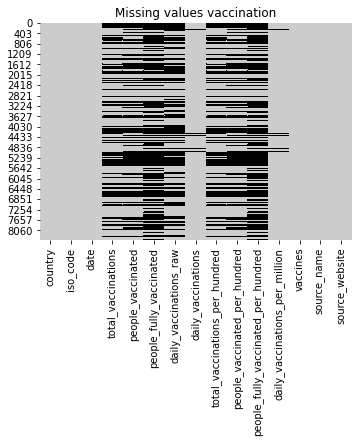

In [11]:
# Visualizing matrices of missing values in data
plt.figure(figsize=(19, 4)) # Set the size of the visualizations
plt.subplot(1, 3, 1) # Set the number of columns, rows and the position of the graph
sns.heatmap(data[0].isnull(), cbar=False, cmap='nipy_spectral_r')
plt.title('Missing values vaccination')